In [133]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import radians, sin, cos, acos
from math import log
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# On charge le dataset
df = pd.read_csv('data/train.csv', parse_dates= [2,3])


In [116]:
round(df.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,2.000,2.000,-74.000,41.000,-74.000,41.000,959.000
std,0.000,1.000,0.000,0.000,0.000,0.000,5237.000
min,1.000,0.000,-122.000,34.000,-122.000,32.000,1.000
25%,1.000,1.000,-74.000,41.000,-74.000,41.000,397.000
50%,2.000,1.000,-74.000,41.000,-74.000,41.000,662.000
75%,2.000,2.000,-74.000,41.000,-74.000,41.000,1075.000
max,2.000,9.000,-61.000,52.000,-61.000,44.000,3526282.000


In [117]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [118]:
print("Nombre de lignes dupliquées")
print(df.duplicated().value_counts())
print("\n" + "Nombre de valeurs manquantes")
print(df.isnull().sum())



Nombre de lignes dupliquées
False    1458644
dtype: int64

Nombre de valeurs manquantes
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [128]:
df = df[(df["trip_duration"] < 10000) & (df["trip_duration"] > 60)]
df = df[(df["distance"] > 0.1)  & (df["distance"] < 15)]

# vitesse moyenne de chaque trajet (en km/h) 

In [120]:
def calc_distance(row):
    slat = radians(row['pickup_latitude'])
    slon = radians(row['pickup_longitude']) 
    elat = radians(row['dropoff_latitude'])
    elon = radians(row['dropoff_longitude'])
    value = sin(slat) * sin(elat) + cos(slat) * cos(elat)*cos(slon - elon)
    if value > 1 or value < -1:
        return np.nan
    else:
        dist = 6371.01 * acos(value)
        return dist
    
def calc_speed(row):
    return row.distance/(row.trip_duration/3600)

df["distance"] = df.apply(calc_distance, axis = 1)
df["speed_mean"] = df.apply(calc_speed, axis = 1)

# nombre de trajets effectués en fonction du jour de la semaine 

In [121]:
df_count_by_day = df.groupby(df['pickup_datetime'].dt.day_name()).count()['id']
df_count_by_day.head(20)

pickup_datetime
Friday       223533
Monday       187418
Saturday     220868
Sunday       195366
Thursday     218574
Tuesday      202749
Wednesday    210136
Name: id, dtype: int64

# nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h. 

In [122]:
df_count_by_hour = df.groupby(df['pickup_datetime'].dt.hour).count()['id']
df_count_by_hour


pickup_datetime
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: id, dtype: int64

-


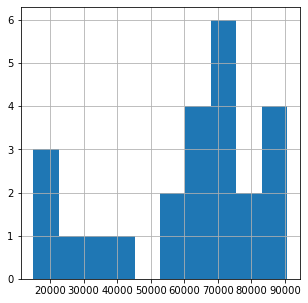

In [123]:
df_count_by_hour.hist(figsize=(5,5))
print("-")


# nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h. 

In [124]:
total=0
res=[]
for i in range(1,25):
    total += df_count_by_hour[i-1]
    if i%4 == 0:
        res.append(total)
        total = 0

for i,tranche in enumerate(["0-4h", "4-8h", "8-12h", "12-16h", "16-20h", "20-24h"]):
    print(tranche, res[i])

0-4h 140686
4-8h 119642
8-12h 268629
12-16h 289449
16-20h 321704
20-24h 318534


# nombre de km parcourus par jour de la semaine 

In [125]:
df_distance_by_day = df.groupby(df['pickup_datetime'].dt.day_name()).distance.sum()
df_distance_by_day

pickup_datetime
Friday      758725.676
Monday      668483.172
Saturday    736412.300
Sunday      726454.401
Thursday    747678.813
Tuesday     678329.170
Wednesday   702919.909
Name: distance, dtype: float64

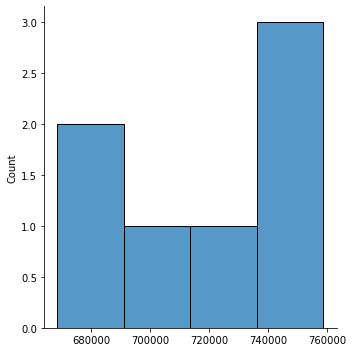

In [139]:
sns.displot(df_distance_by_day, x=df_distance_by_day.values);

# De plus, chaque indicateur sera illustré par un graphique. De plus, chaque indicateur sera illustré par un graphique.